https://medium.com/swlh/practical-data-analysis-using-pandas-global-terrorism-database-20b29009adad

## Global Terrorism Data Analysis 

In [9]:
import time
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

In [10]:
terror_df = pd.read_csv('terrorism.csv', sep=',', encoding="ISO-8859-1")
terror_df.head(3)

C:\Users\Mark\AppData\Local\Temp\ipykernel_3344\3227520436.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror_df = pd.read_csv('terrorism.csv', sep=',', encoding="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
print ('dataframe shape: ', terror_df.shape)

dataframe shape:  (181691, 135)


In [12]:
# print ('check the column names: ', terror_df.columns[90:120])

In [13]:
#### select only relevant coumns (Depend on what we would like to do with the data)

columns_select = ['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'success', 
                  'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound', 'gname']

columns_names = ['Id', 'Year', 'Country', 'Region', 'City', 'Lat', 'Lon', 'Success', 'AttackType', 
                 'TargetType', 'WeaponType', 'Kill', 'Wounded',  'TerroristGroup']

terror_df_selected = terror_df[columns_select]

terror_df_selected.columns = columns_names

print ('selected dataframe shape: ', terror_df_selected.shape)

terror_df_selected.head(3)

selected dataframe shape:  (181691, 14)


,Id,Year,Country,Region,City,Lat,Lon,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup
0,1.970000e+11,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,1.970000e+11,1970,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,1.970010e+11,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown


In [14]:
### find the null (NaN) or zero values

print ('null values in entire dataframe: ', terror_df_selected.isnull().values.any())
print ('total number of null values: ', terror_df_selected.isnull().sum().sum())

null values in entire dataframe:  True
total number of null values:  36172


In [15]:
print ('NaNs in every column: \n', terror_df_selected.isna().sum())

NaNs in every column: 
 Id                    0
Year                  0
Country               0
Region                0
City                435
Lat                4556
Lon                4557
Success               0
AttackType            0
TargetType            0
WeaponType            0
Kill              10313
Wounded           16311
TerroristGroup        0
dtype: int64


Text(0.5, 1.0, 'Number of Terrorist Attack Year by Year')

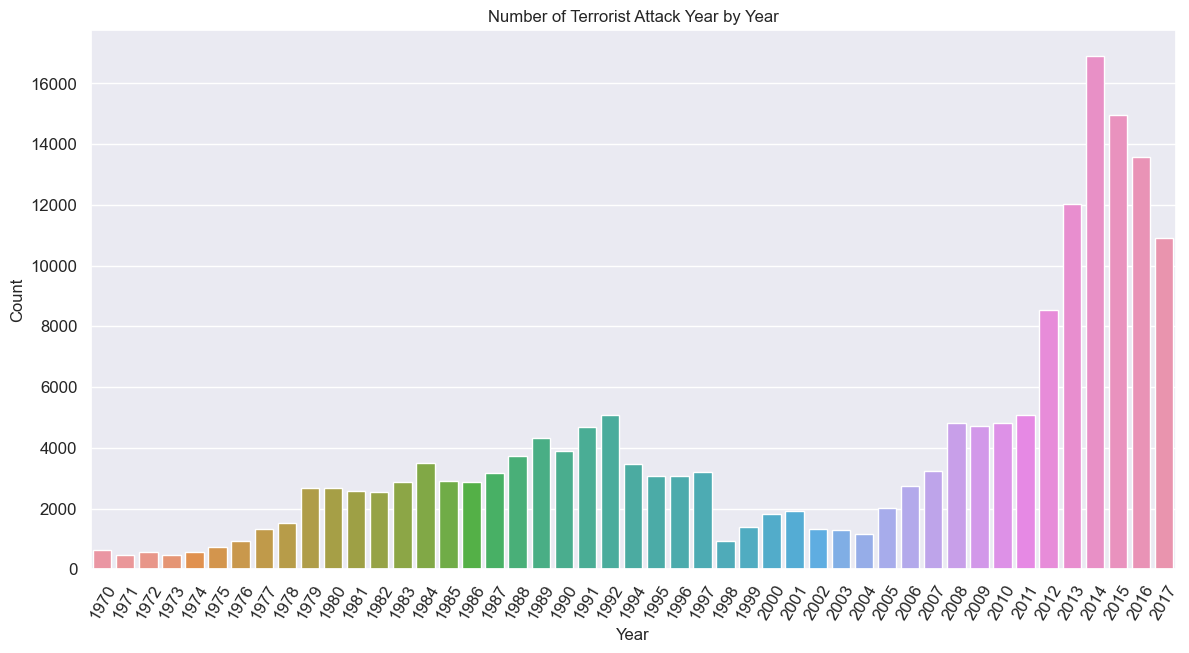

In [16]:
f = plt.figure(figsize=(14, 7))

sns.set(font_scale=1.1)
year_count = sns.countplot(x='Year', data=terror_df_selected,)
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack Year by Year', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/terror_year.png', dpi=200)

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

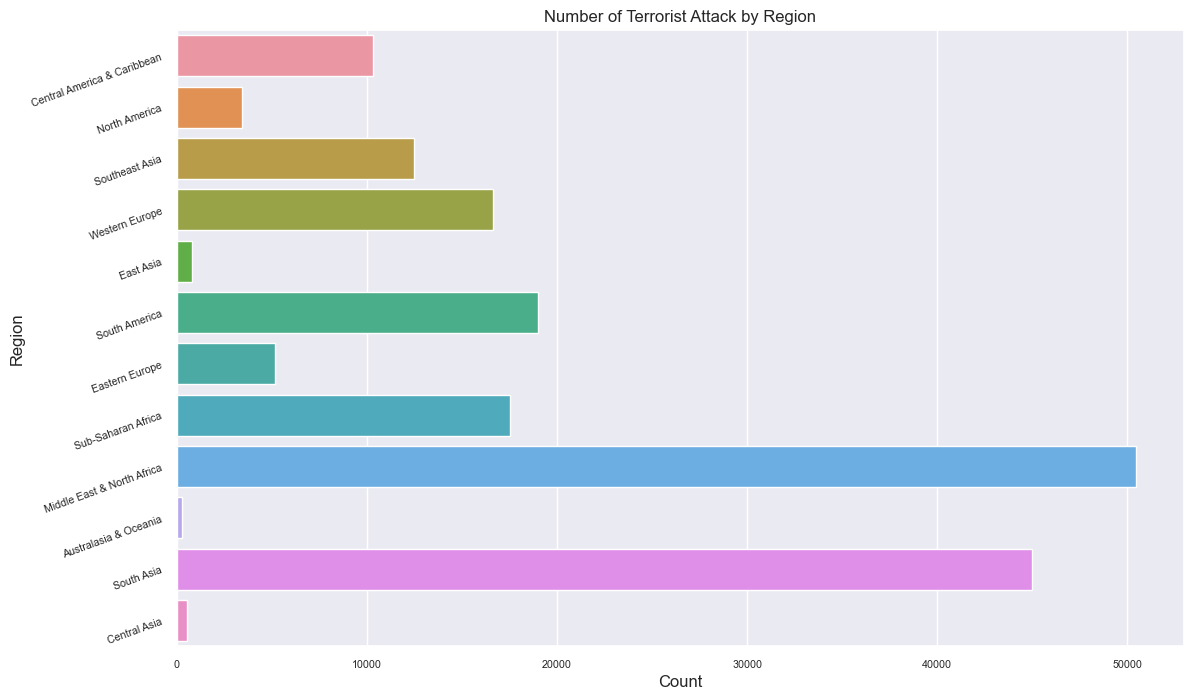

In [17]:
f = plt.figure(figsize=(13, 8))

sns.set(font_scale=0.7)
year_count = sns.countplot(y='Region', data=terror_df_selected,)
year_count.set_yticklabels(year_count.get_yticklabels(), rotation=20)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Terrorist Attack by Region', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/region_attack.png', dpi=200)

Text(0.5, 1.0, 'Types of Terrorist Attack ')

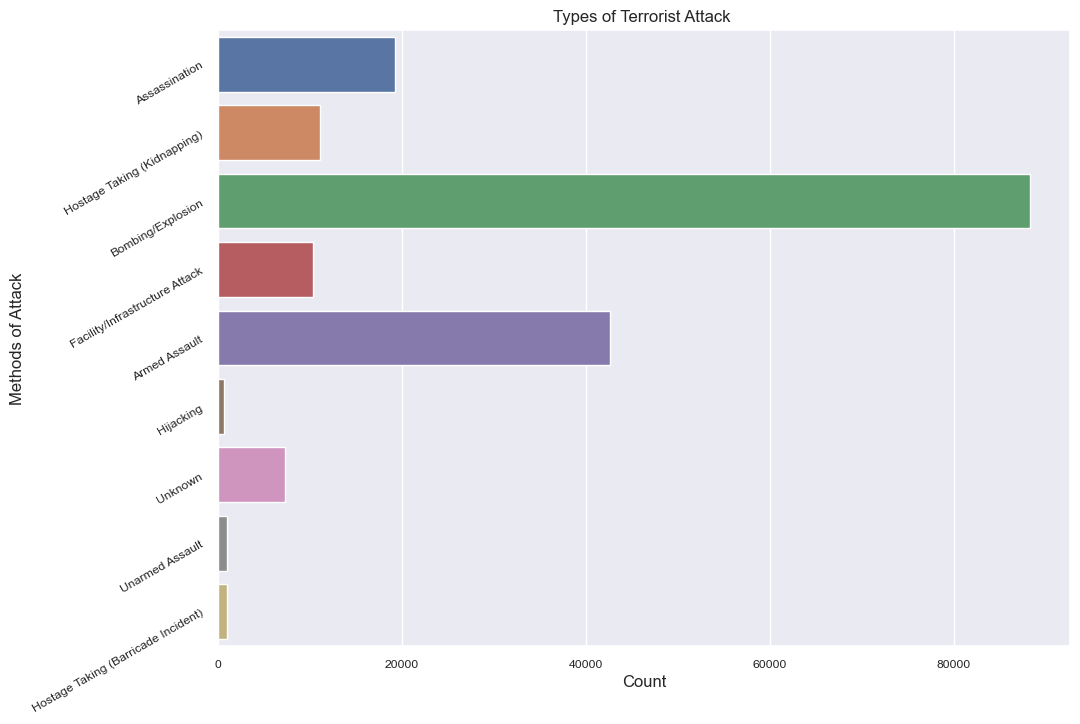

In [18]:
f = plt.figure(figsize=(11, 8))

sns.set(font_scale=0.8)
year_count = sns.countplot(y='AttackType', data=terror_df_selected,)
year_count.set_yticklabels(year_count.get_yticklabels(), rotation=30)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Methods of Attack', fontsize=12)
plt.title('Types of Terrorist Attack ', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/Types_of_attack.png', dpi=200)
# plt.close()

Text(0.5, 1.0, 'Types of Targets of Terrorist Attack ')

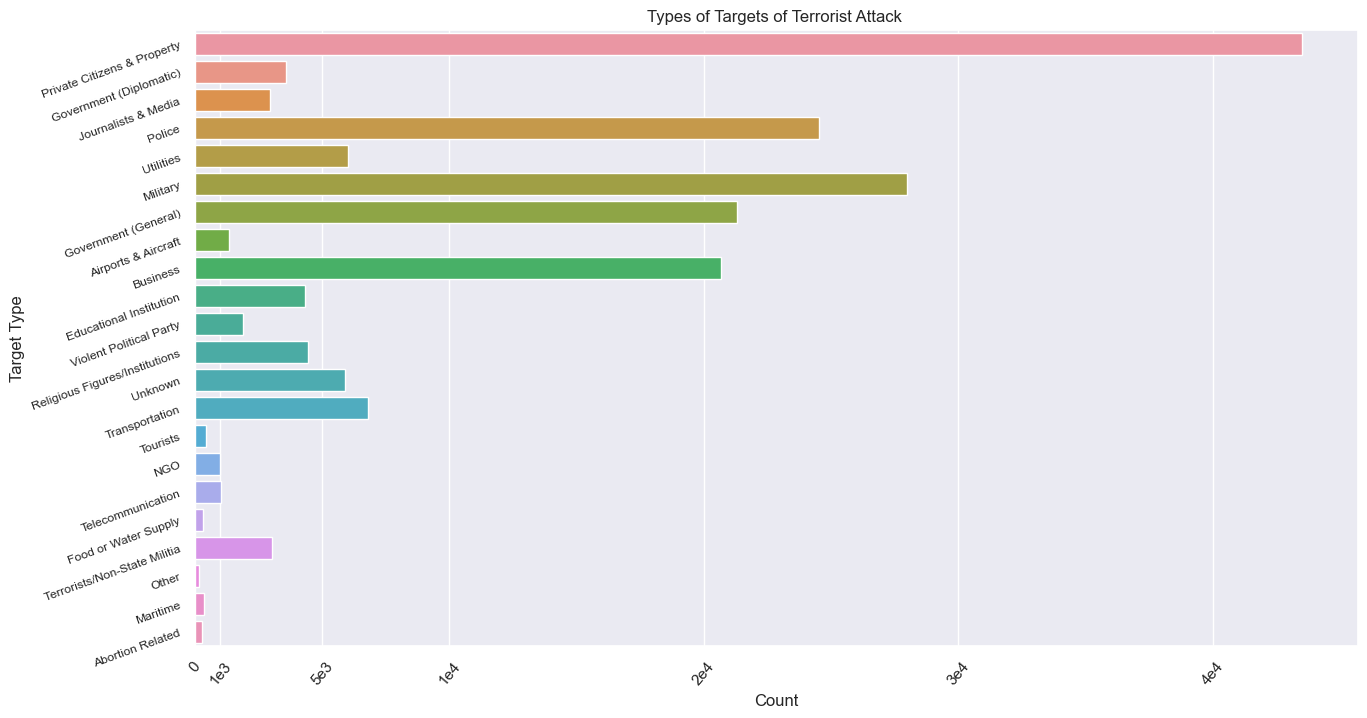

In [19]:
f = plt.figure(figsize=(15, 8))

sns.set(font_scale=0.8)
year_count = sns.countplot(y='TargetType', data=terror_df_selected,)
year_count.set_yticklabels(year_count.get_yticklabels(), rotation=20)
year_count.set_xlabel('Count', fontsize=12)
year_count.set_ylabel('Target Type', fontsize=12)
target_type_xticks  = [0, 1e3, 5e3, 1e4, 2e4, 3e4, 4e4]
target_type_xlabels = ['0', '1e3', '5e3', '1e4', '2e4', '3e4', '4e4']
plt.xticks(target_type_xticks, target_type_xlabels, fontsize=11, rotation=50)
plt.title('Types of Targets of Terrorist Attack ', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/Target_type.png', dpi=200)

Text(0.5, 1.0, 'Top 15 Countries: Most Attacks by Terrorist Groups')

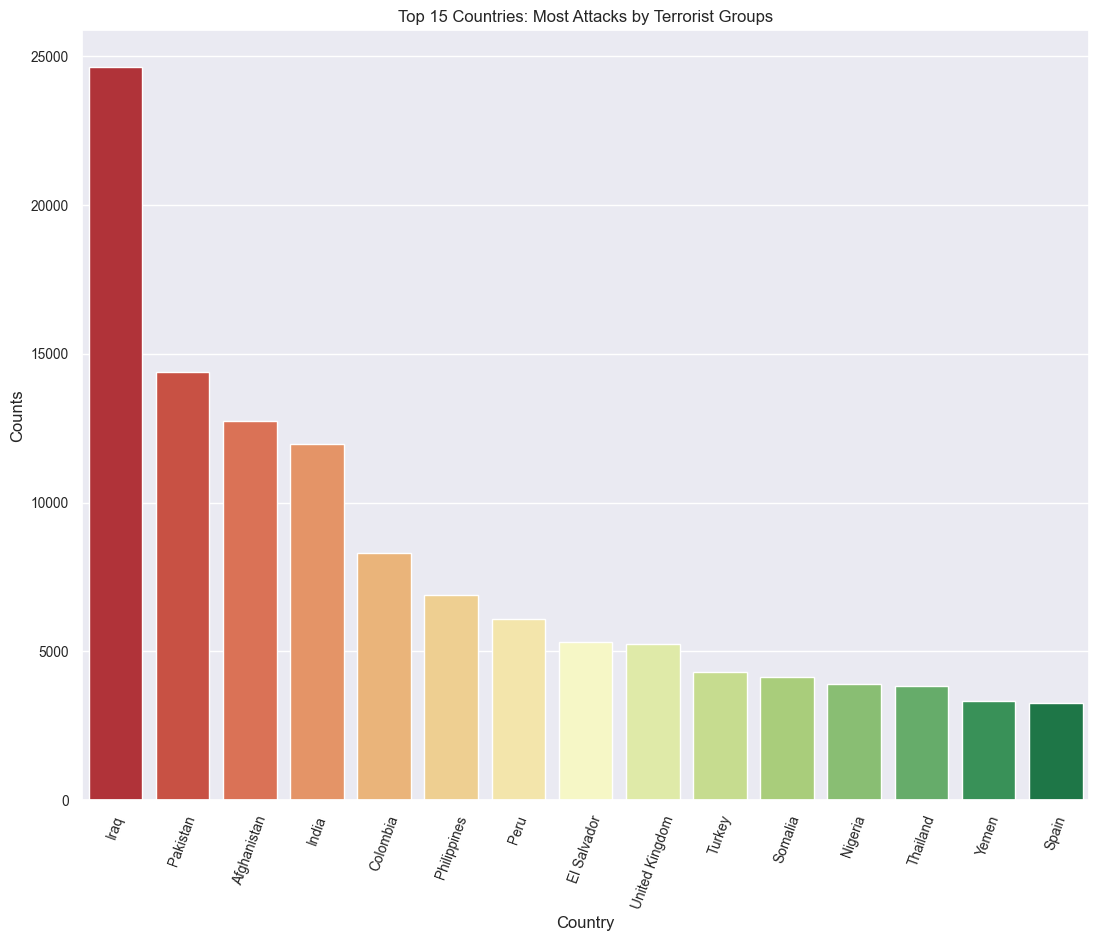

In [20]:
#### plot the attacks vs Country
fig= plt.figure(figsize=(13, 10))
sns.set(font_scale=0.9)
terror_country = sns.barplot(x=terror_df_selected['Country'].value_counts()[0:15].index, y=terror_df_selected['Country'].value_counts()[0:15], palette='RdYlGn')
terror_country.set_xticklabels(terror_country.get_xticklabels(), rotation=70)
terror_country.set_xlabel('Country', fontsize=12)
terror_country.set_ylabel('Counts', fontsize=12)
plt.title('Top 15 Countries: Most Attacks by Terrorist Groups', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/most_attacked_country15.png', dpi=200)
# plt.show()

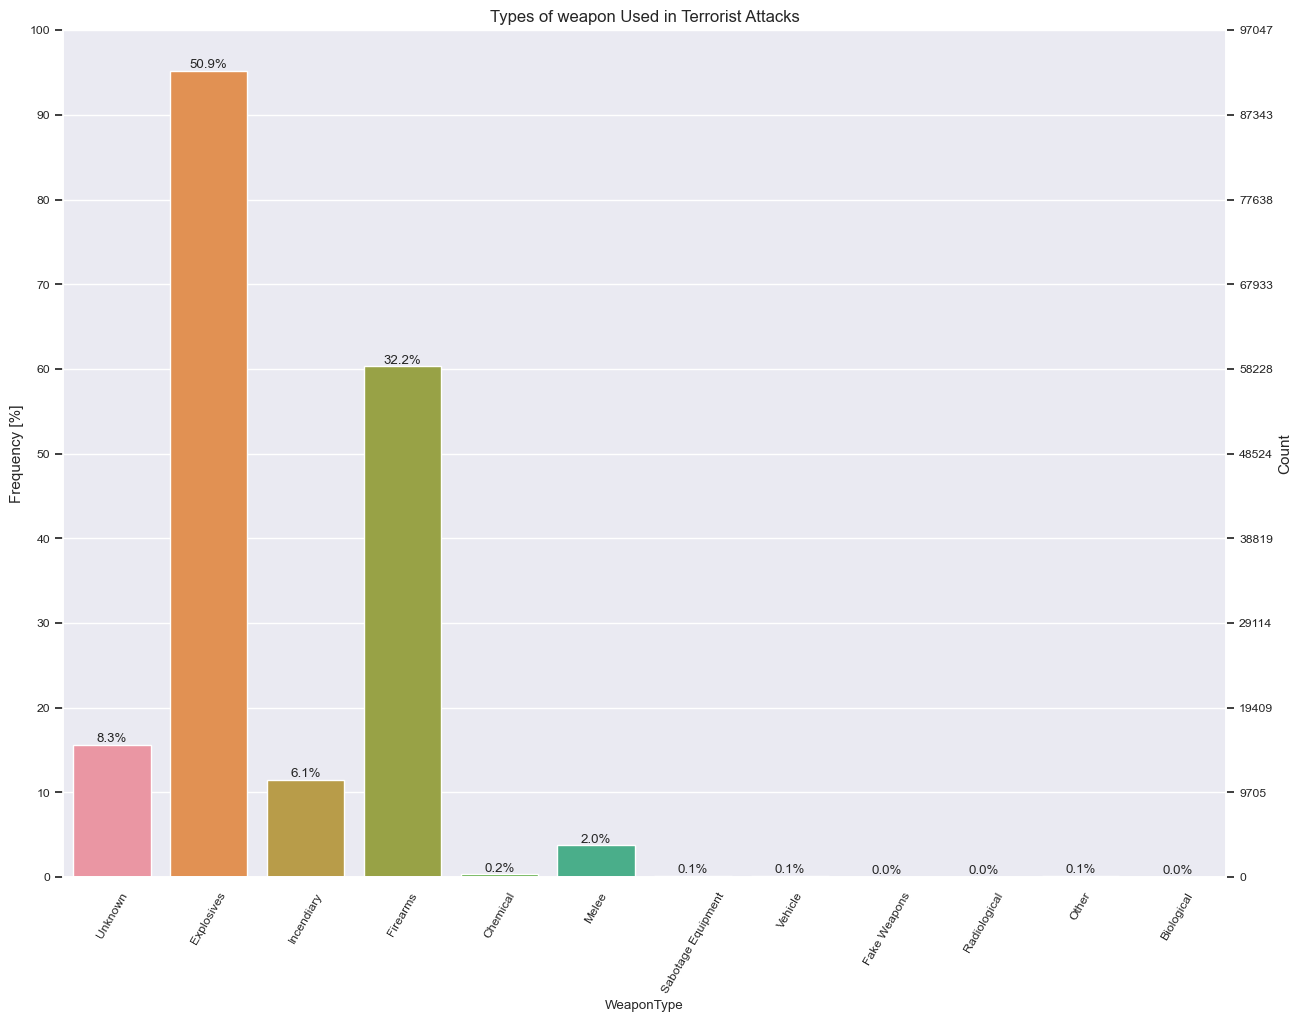

In [23]:
f = plt.figure(figsize=(15, 11))
sns.set(font_scale=0.8)

terror_df_selected['WeaponType'] = terror_df_selected['WeaponType'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], 'Vehicle')

ncount = len(terror_df_selected)

year_count = sns.countplot(x='WeaponType', data=terror_df_selected,)
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=60)
plt.title('Types of weapon Used in Terrorist Attacks', fontsize=12)

ax2=year_count.twinx()

ax2.yaxis.tick_left()
year_count.yaxis.tick_right()

# Also switch the labels over
year_count.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]', fontsize=11)

for p in year_count.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    year_count.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
year_count.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
# year_count.set_ylim(0, int(ncount/1e3))
year_count.set_ylabel('Count', fontsize=11)

ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax2.grid(None)
plt.savefig('weptype_count_freq.png', dpi=200)

In [24]:
terror_df_selected['WeaponType'].value_counts()

WeaponType
Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: count, dtype: int64

In [25]:
region_year = pd.crosstab(terror_df_selected.Year, terror_df_selected.Region)

region_year.head(3)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376


<Figure size 1100x1000 with 0 Axes>

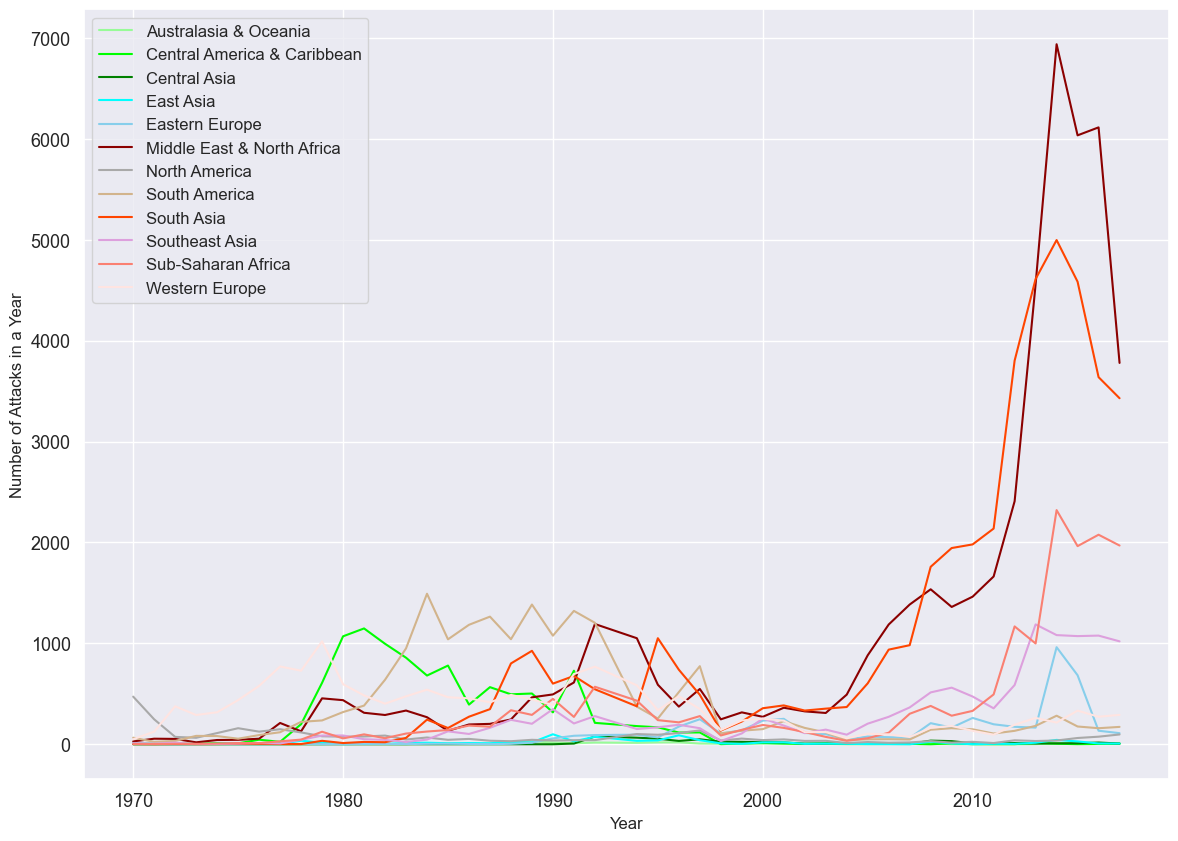

In [26]:
fig = plt.figure(figsize=(11, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                     'orangered', 'plum', 'salmon', 'mistyrose']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks in a Year', fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/attack_region.png', dpi=200)
# plt.show()

In [27]:
### instead of every year we can consider a decade to make more clear plots
### use pandas cut  

In [28]:
terror_df_selected['Year10'] = pd.cut(terror_df_selected['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], 
               labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020'])
terror_df_selected.head(3)

,Id,Year,Country,Region,City,Lat,Lon,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup,Year10
0,1.970000e+11,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D,1970-1980
1,1.970000e+11,1970,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League,1970-1980
2,1.970010e+11,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown,1970-1980


In [29]:
region_year10 = pd.crosstab(terror_df_selected.Year10, terror_df_selected.Region,)
region_year10.head(6)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year10,,,,,,,,,,,,
1970-1980,23,1988,0,79,27,1527,1671,1328,63,281,300,5289
1980-1990,89,6736,0,208,100,2940,520,10455,3460,1347,1968,4562
1990-2000,101,1545,356,336,1238,5201,658,4837,4596,1551,2429,3841
2000-2010,23,46,136,70,1353,9304,253,1147,9650,2924,1860,1286
2010-2020,46,29,71,109,2426,31502,354,1211,27205,6382,10993,1661


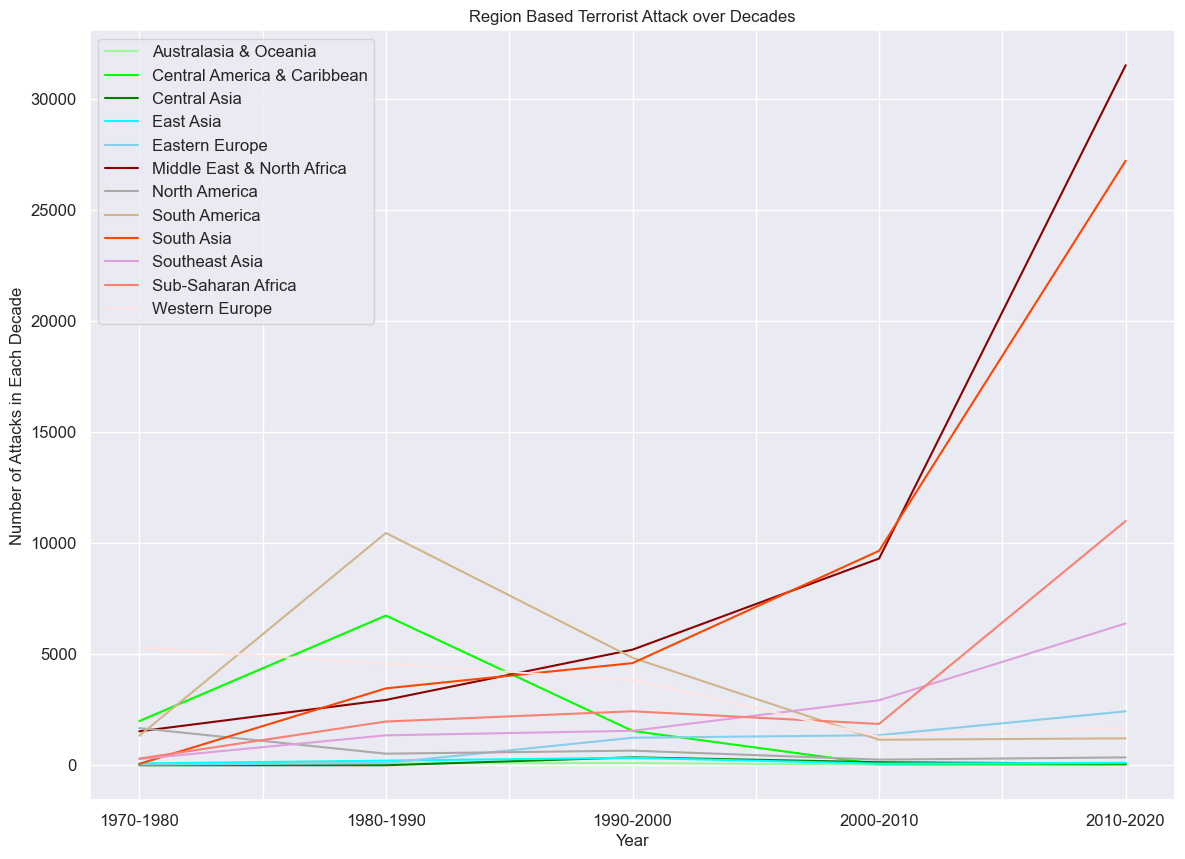

In [30]:
region_year10.plot(figsize=(14, 10), fontsize=12, color=color_list_reg_yr)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks in Each Decade', fontsize=12)
plt.title('Region Based Terrorist Attack over Decades', fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/attack_region10yrs.png', dpi=200)
# plt.show()

Now we see clear trend of increasing terrorism activities in middle east and south asia whereas other regions are doing better. 

In [31]:
weapon_type_Region_year10 = pd.crosstab(terror_df_selected.Year10, terror_df_selected.WeaponType)
weapon_type_Region_year10.head(6)

WeaponType,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,Vehicle
Year10,,,,,,,,,,,,
1970-1980,0,35,5478,4,4127,1475,91,6,2,5,1351,2
1980-1990,8,21,14769,1,12661,1919,315,6,1,24,2651,9
1990-2000,1,65,10242,18,9651,2650,1163,32,10,11,2828,18
2000-2010,22,73,15536,6,8682,1483,566,17,1,44,1605,17
2010-2020,4,127,46401,4,23403,3608,1520,53,0,57,6722,90


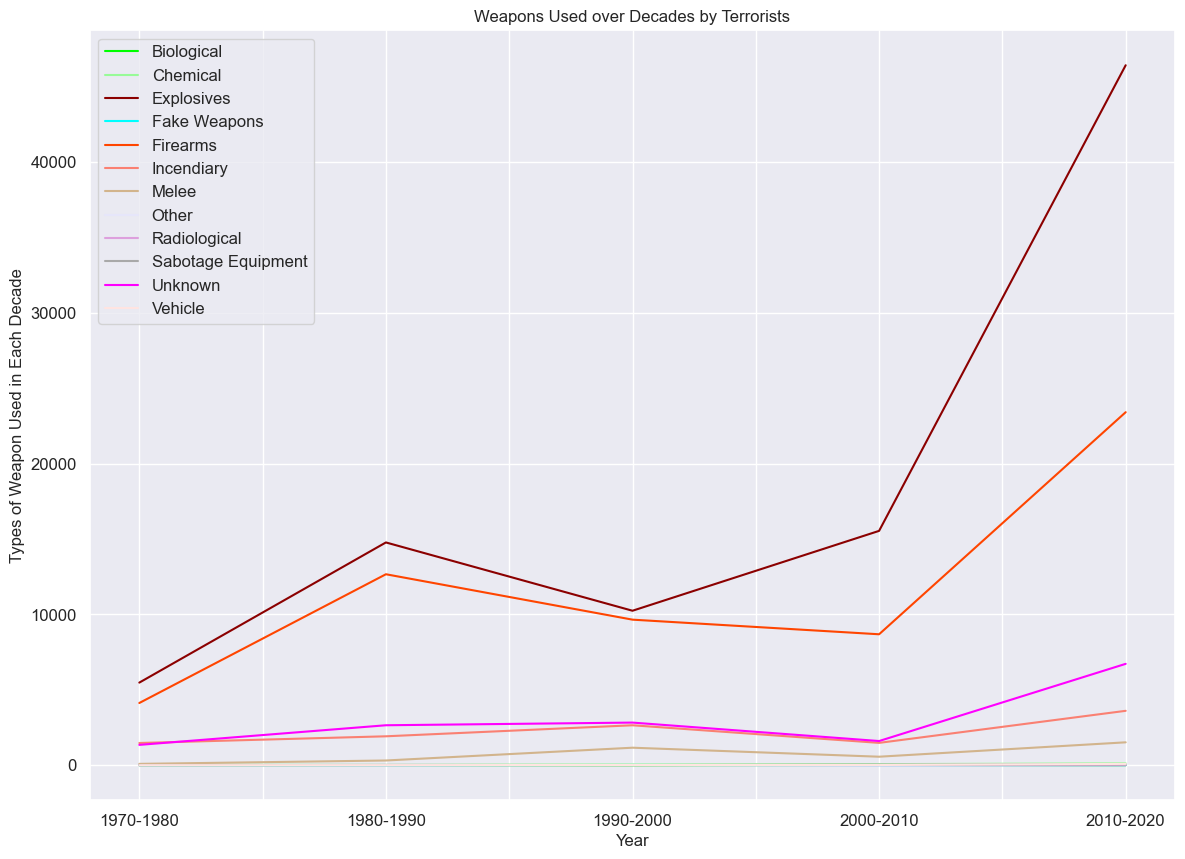

In [32]:
color_list_weapon_yr = ['lime', 'palegreen', 'darkred', 'Aqua', 'orangered', 'salmon', 'tan', 'lavender', 'plum', 'darkgray', 'magenta', 'mistyrose']
weapon_type_Region_year10.plot(figsize=(14, 10), fontsize=12, color=color_list_weapon_yr)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Types of Weapon Used in Each Decade', fontsize=12)
plt.title('Weapons Used over Decades by Terrorists', fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/weapon_attack10yrs.png', dpi=200)
# plt.show()

Explosives and firearms are always dominating among weapons of destructions. 

In [33]:
# Since people injured and killed are useful and there are null values in the dataframe we remove the NaNs with zeros 
terror_df_selected['Kill'] = terror_df_selected['Kill'].fillna(0).astype(int)
terror_df_selected['Wounded'] = terror_df_selected['Wounded'].fillna(0).astype(int)

In [34]:
#### Use Dataframe Groupby 
#### Let's see region based results, I will consider First South Asia 

reg_groupby = terror_df_selected.groupby(['Region'])
reg_groupby_SA_df = reg_groupby.get_group('South Asia')

reg_groupby_SA_df.head(3)

,Id,Year,Country,Region,City,Lat,Lon,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup,Year10
585,1.970110e+11,1970,Pakistan,South Asia,Karachi,24.891115,67.143311,1,Assassination,Government (Diplomatic),Vehicle,4,20,Unknown,1970-1980
1186,1.972020e+11,1972,India,South Asia,New Delhi,28.585836,77.153336,1,Hijacking,Airports & Aircraft,Explosives,0,0,Palestinians,1970-1980
1863,1.973050e+11,1973,Afghanistan,South Asia,Kabul,34.516895,69.147011,0,Unknown,Airports & Aircraft,Unknown,0,1,Black December,1970-1980


In [35]:
reg_groupby_SA_df.index = range(len(reg_groupby_SA_df.index))

reg_groupby_SA_df.head(3)

,Id,Year,Country,Region,City,Lat,Lon,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup,Year10
0,1.970110e+11,1970,Pakistan,South Asia,Karachi,24.891115,67.143311,1,Assassination,Government (Diplomatic),Vehicle,4,20,Unknown,1970-1980
1,1.972020e+11,1972,India,South Asia,New Delhi,28.585836,77.153336,1,Hijacking,Airports & Aircraft,Explosives,0,0,Palestinians,1970-1980
2,1.973050e+11,1973,Afghanistan,South Asia,Kabul,34.516895,69.147011,0,Unknown,Airports & Aircraft,Unknown,0,1,Black December,1970-1980


In [36]:
##### terrorist attack in south asia dataframe 
print ('shape of reg_grp_SA_df: ', reg_groupby_SA_df.shape) 

reg_groupby_SA_df['Country'].value_counts()

shape of reg_grp_SA_df:  (44974, 15)


Country
Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: count, dtype: int64

Text(0.5, 1.0, 'South Asian Countries Affected in Terrorist Attack ')

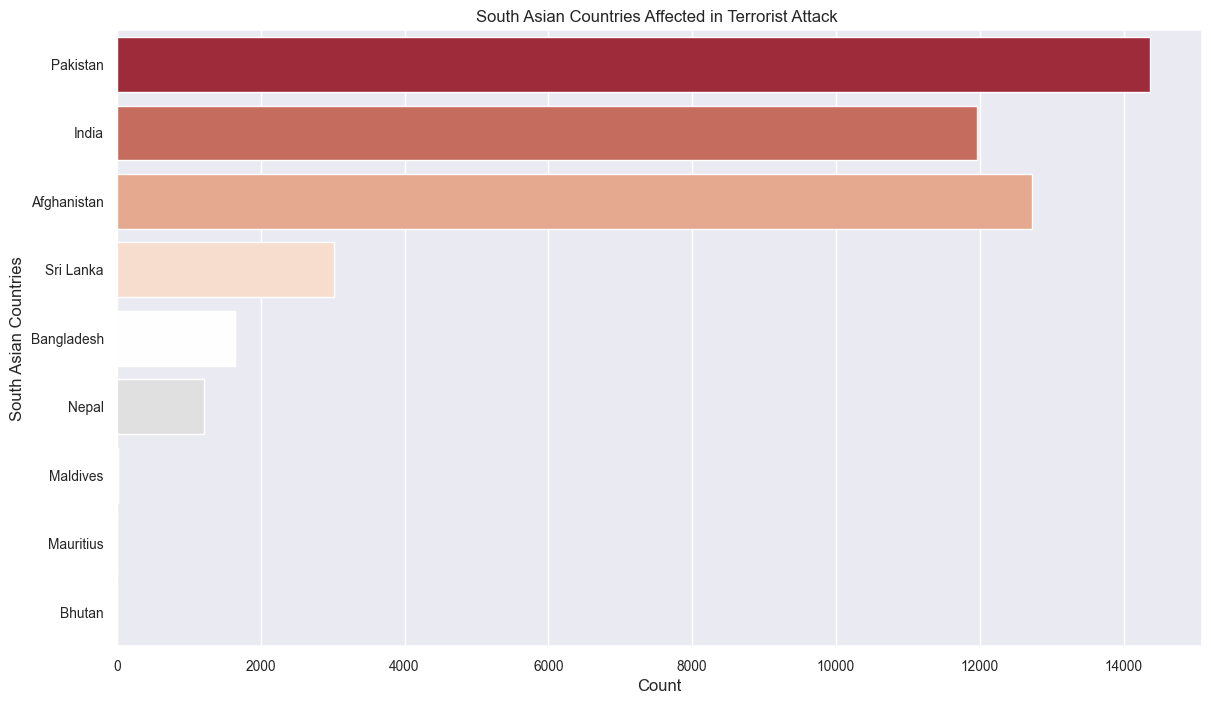

In [37]:
f = plt.figure(figsize=(14, 8))

sns.set(font_scale=0.9)
Country_count_SA = sns.countplot(y='Country', data=reg_groupby_SA_df, palette='RdGy')
# year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
Country_count_SA.set_xlabel('Count', fontsize=12)
Country_count_SA.set_ylabel('South Asian Countries', fontsize=12)
plt.title('South Asian Countries Affected in Terrorist Attack ', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/South_Asia_country_attack.png', dpi=200)

In [38]:
print ('There are {} unique number of terror groups in Souh East Asia'.format(len(reg_groupby_SA_df['TerroristGroup'].unique())) )
# print ('We select top 10 Groups involved in terrorist attacks')

reg_groupby_SA_df_top10TerrorG = reg_groupby_SA_df['TerroristGroup'].value_counts()[1:11].to_frame(name='Counts')

# drop 0 because that is unknown group
# reg_groupby_SA_df_top10TerrorG.head(3)

reg_groupby_SA_df_top10TerrorG['Terror Group'] = reg_groupby_SA_df_top10TerrorG.index
reg_groupby_SA_df_top10TerrorG.reset_index(drop=True, inplace=True)
reg_groupby_SA_df_top10TerrorG.head(3)

There are 591 unique number of terror groups in Souh East Asia


,Counts,Terror Group
0,7477,Taliban
1,1878,Communist Party of India - Maoist (CPI-Maoist)
2,1625,Maoists


Text(0.5, 1.0, 'Top 10 Terror Groups in South Asia')

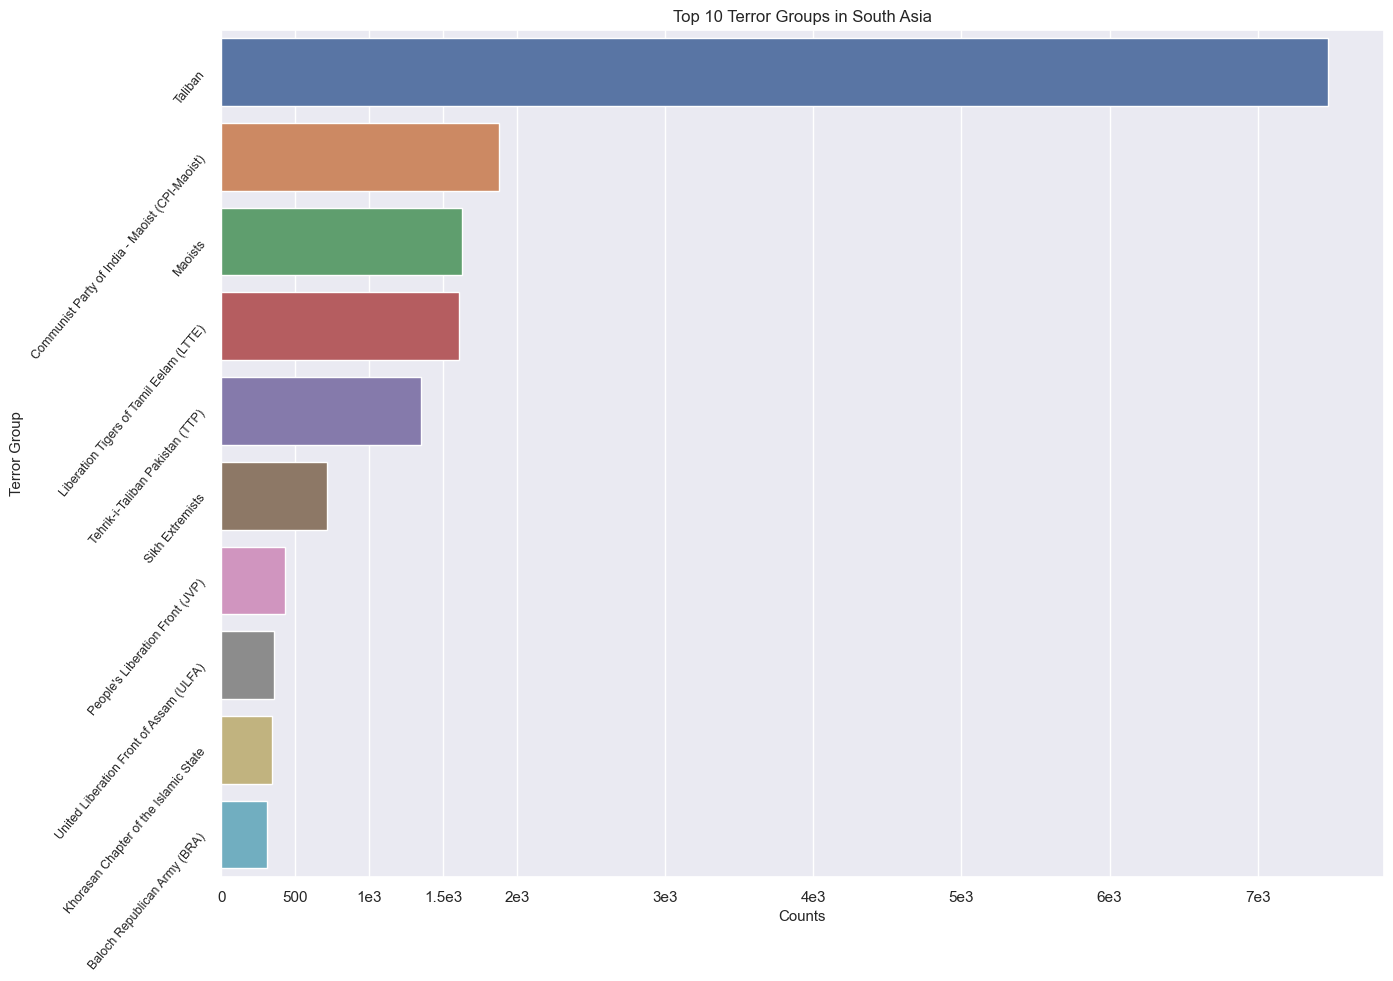

In [39]:
f = plt.figure(figsize=(15, 11))
sns.set(font_scale=0.9)
bar_SA_top10TG = sns.barplot(y='Terror Group', x='Counts', data=reg_groupby_SA_df_top10TerrorG)
bar_SA_top10TG.set_yticklabels(bar_SA_top10TG.get_yticklabels(), rotation=50, fontsize=9)
plt.xscale('linear')

xticks = [0, 500, 1e3, 1.5e3, 2e3, 3e3, 4e3, 5e3, 6e3,  7e3]
xlabels = ['0', '500', '1e3', '1.5e3', '2e3', '3e3',  '4e3',  '5e3',  '6e3',  '7e3']
plt.xticks(xticks, xlabels, fontsize=11)

plt.title('Top 10 Terror Groups in South Asia', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/top10terror_grp.png', dpi=200)
# plt.clf()

A lot of attacks were carried on by unknown groups while, among known groups Talibans dominate. 

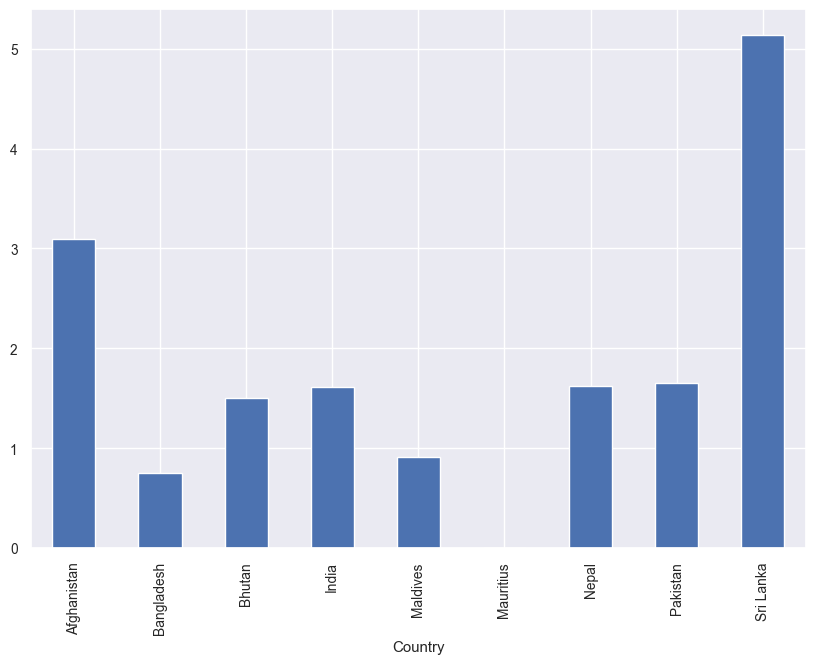

In [40]:
### we can plot stacked bar plots to estimate killed and wounded people for every country in SA region 

f = plt.figure(figsize=(10, 7))
reg_groupby_SA_df_grp_country_kill = reg_groupby_SA_df.groupby(['Country'])['Kill'].mean()
reg_groupby_SA_df_grp_country_kill.plot.bar()
plt.show()

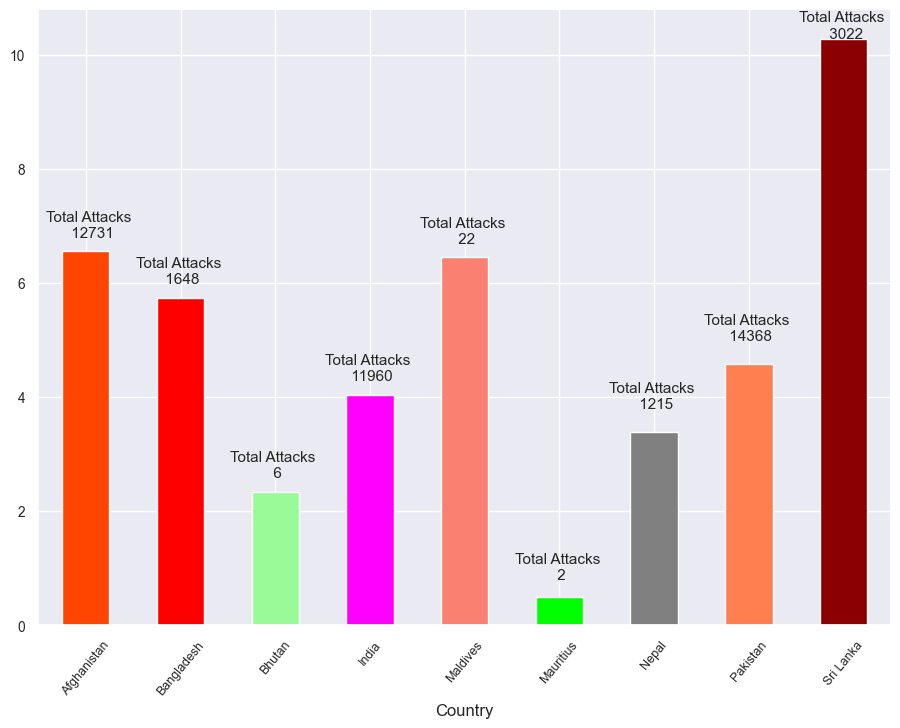

In [41]:
### create a new column combining killed and wounded 
reg_groupby_SA_df['Affected'] = reg_groupby_SA_df['Kill'] + reg_groupby_SA_df['Wounded']
f = plt.figure(figsize=(11, 8))
reg_groupby_SA_df_grp_country_affected = reg_groupby_SA_df.groupby(['Country'])['Affected'].mean()
reg_plot_check = reg_groupby_SA_df_grp_country_affected.plot.bar(color=['orangered', 'red', 'palegreen', 'magenta', 'salmon', 'lime', 'gray', 'coral', 'darkred'])
reg_plot_check.set_xticklabels(reg_plot_check.get_xticklabels(), rotation=50, fontsize=9)

plt.xlabel('Country', fontsize=12)

plt.text(8, 10.3, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Sri Lanka']), horizontalalignment='center', fontsize=11)
plt.text(7, 5, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Pakistan']), horizontalalignment='center', fontsize=11)
plt.text(6, 3.8, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Nepal']), horizontalalignment='center', fontsize=11)
plt.text(5, 0.8, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Mauritius']), horizontalalignment='center', fontsize=11)
plt.text(4, 6.7, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Maldives']), horizontalalignment='center', fontsize=11)
plt.text(3, 4.3, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['India']), horizontalalignment='center', fontsize=11)
plt.text(2, 2.6, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Bhutan']), horizontalalignment='center', fontsize=11)
plt.text(1, 6.0, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Bangladesh']), horizontalalignment='center', fontsize=11)
plt.text(0.05, 6.8, 'Total Attacks \n {}'.format(reg_groupby_SA_df['Country'].value_counts()['Afghanistan']), horizontalalignment='center', fontsize=11)

# plt.savefig('/content/drive/My Drive/Colab Notebooks/Mean_fatality_SA.png', dpi=200)
plt.show()

In [42]:
# print ('maximum number of affected people in a single terrorist attack: ', reg_groupby_SA_df.iloc[reg_groupby_SA_df['Affected'].idxmax()])

In [43]:
reg_groupby_SA_df_most_affected10 = reg_groupby_SA_df.sort_values('Affected', ascending=False).head(5)
reg_groupby_SA_df_most_affected10

,Id,Year,Country,Region,City,Lat,Lon,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup,Year10,Affected
6273,1.996010e+11,1996,Sri Lanka,South Asia,Colombo,6.941837,79.861687,1,Bombing/Explosion,Business,Explosives,90,1272,Liberation Tigers of Tamil Eelam (LTTE),1990-2000,1362
10749,2.006070e+11,2006,India,South Asia,Mumbai,19.075984,72.877656,1,Bombing/Explosion,Transportation,Explosives,188,817,Lashkar-e-Taiba (LeT),2000-2010,1005
9249,2.004030e+11,2004,Nepal,South Asia,Dhading district,27.959441,84.895897,1,Armed Assault,Government (General),Firearms,518,216,Communist Party of Nepal- Maoist (CPN-M),2000-2010,734
42958,2.017050e+11,2017,Afghanistan,South Asia,Kabul,34.516895,69.147011,1,Bombing/Explosion,Government (Diplomatic),Explosives,93,491,Khorasan Chapter of the Islamic State,2010-2020,584
36913,2.015090e+11,2015,Afghanistan,South Asia,Kunduz,36.705776,68.877060,1,Armed Assault,Private Citizens & Property,Firearms,240,296,Taliban,2010-2020,536


In [44]:
## sanity check with value_counts

reg_groupby_SA_df_most_affected10['Country'].value_counts()['Afghanistan']

2

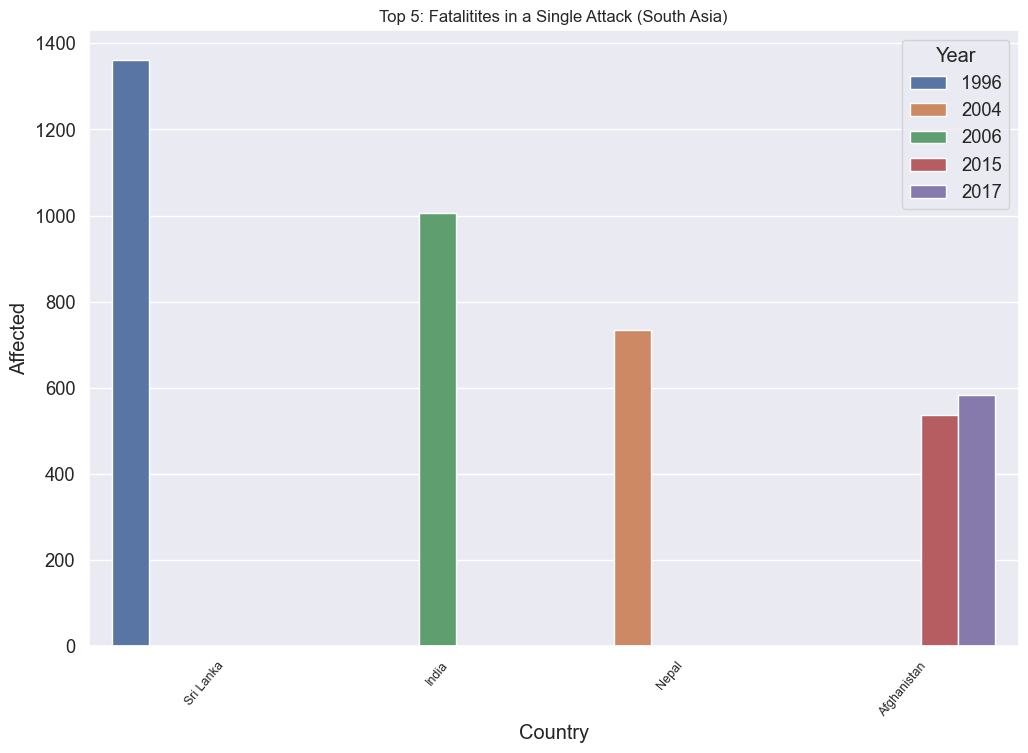

In [45]:
fig = plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
top_5_fatal = sns.barplot(y='Affected', x='Country', data=reg_groupby_SA_df_most_affected10, hue='Year', )
top_5_fatal.set_xticklabels(top_5_fatal.get_xticklabels(), rotation=50, fontsize=9)
# plt.text(1, 50, 'Attacked Twice')
plt.title('Top 5: Fatalitites in a Single Attack (South Asia)', fontsize=12)
plt.show()

In [46]:
#### plot a pie chart 
# explode_list_1985 = [0.6, 0.1, 0.1, 0.1, 0.2, 0.0, 0.1, 0.1, 0.0, 0.1]

# fig = plt.figure(figsize=(10,7))

# reg_groupby_SA_df_most_affected10['Affected'].plot(kind='pie', explode = explode_list_1985, fontsize=16, autopct='%1.2f%%', 
#                                        pctdistance=0.7, labels=None, )

# labels_affected = reg_groupby_SA_df_most_affected10.Country
# plt.legend(labels_affected, loc='upper left', fontsize=12, bbox_to_anchor=(-0.4,1.1))  
# plt.show()

In [47]:
reg_groupby_SA_df_most_affected10_grp_country = reg_groupby_SA_df_most_affected10.groupby(['Country'])['Affected'].sum()
reg_groupby_SA_df_most_affected10_grp_country

Country
Afghanistan    1120
India          1005
Nepal           734
Sri Lanka      1362
Name: Affected, dtype: int32

In [48]:
#### let's plot the folium maps with cities in South Asia Affected by 
### previously we checked null values in the total dataframe
print ('NaNs in every column: \n', reg_groupby_SA_df.isna().sum())
print ('South Asia dataframe shape: ', reg_groupby_SA_df.shape)

NaNs in every column: 
 Id                  0
Year                0
Country             0
Region              0
City              150
Lat               495
Lon               495
Success             0
AttackType          0
TargetType          0
WeaponType          0
Kill                0
Wounded             0
TerroristGroup      0
Year10              0
Affected            0
dtype: int64
South Asia dataframe shape:  (44974, 16)


In [49]:
### we drop the rows where lat and lon are NaN (495 of them)
reg_groupby_SA_df.dropna(subset=['Lat','Lon'],inplace=True)
print ('new dataframe shape: ', reg_groupby_SA_df.shape)

new dataframe shape:  (44479, 16)


In [50]:


### try to plot folium map 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Kabul'

geolocator = Nominatim(user_agent="Kabul_explorer")
location = geolocator.geocode(address)
Kabul_latitude = location.latitude
Kabul_longitude = location.longitude
print('The geograpical coordinates of Kabul are {}, {}.'.format(Kabul_latitude, Kabul_longitude))

The geograpical coordinates of Kabul are 34.5260109, 69.1776838.


In [51]:
reg_groupby_SA_df_most_affected100 = reg_groupby_SA_df.sort_values('Affected', ascending=False).head(100)

import folium

AroundKabul = folium.Map(location=[Kabul_latitude, Kabul_longitude], zoom_start=4.2, tiles='Stamen Terrain')

for lat, lon, label, fat in zip(reg_groupby_SA_df_most_affected100['Lat'], reg_groupby_SA_df_most_affected100['Lon'], 
                                reg_groupby_SA_df_most_affected100['City'], reg_groupby_SA_df_most_affected100['Affected']):
  label = folium.Popup('{}\n Affected: {}'.format(label, fat), parse_html=True)
  folium.CircleMarker([lat, lon], radius=fat*0.02, popup=label, 
                      color='magenta', fill=True, fill_color='#3186cc', 
                      fill_opacity=0.7).add_to(AroundKabul)

loc = 'Based on Fatalaties: Top 100 Attacks in South Asia'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

AroundKabul.get_root().html.add_child(folium.Element(title_html))
# AroundKabul.save('/content/drive/My Drive/Colab Notebooks/map-with-title.html')

AroundKabul

Installation necessary for basemap and animation 

In [69]:
# !apt install imagemagick
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip
# Tried this and it didn't work. !pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [65]:
# !pip install pyproj==1.9.6

  Using cached pyproj-1.9.6.tar.gz (2.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  using bundled proj4..
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Mark\AppData\Local\Temp\pip-install-5qse4mpm\pyproj_3c25cc2a62b44dc992f10dc96c2c3cfe\setup.py", line 86, in <module>
      objects = cc.compile(['nad2bin.c', 'src/pj_malloc.c'])
    File "C:\Users\Mark\anaconda3\lib\site-packages\setuptools\_distutils\_msvccompiler.py", line 327, in compile
      self.initialize()
    File "C:\Users\Mark\anaconda3\lib\site-packages\setuptools\_distutils\_msvccompiler.py", line 224, in initialize
      vc_env = _get_vc_env(plat_spec)
    File "C:\Users\Mark\anaconda3\lib\site-packages\setuptools\msvc.py", line 316, in msvc14_get_vc_env
      return _msvc14_get_vc_env(plat_spec)
    File "C:\Users\Mark\anaconda3\lib\site-packages\setuptools\msvc.p

I could not get this to work. 

In [66]:
### animate the year by year attack in South Asia 
# boundary of south asia [https://en.wikipedia.org/wiki/Module:Location_map/data/Southeast_Asia]
llon = 58.8
ulon = 98.9
llat = 5.04
ulat = 41.06

from mpl_toolkits.basemap import Basemap


years=list(reg_groupby_SA_df.Year.unique())
# print (years)


fig = plt.figure(figsize=(14, 7), dpi=150)
def year_attack(Year):
    plt.clf()
    plt.title('Terrorism In South Asia '+'\n'+'Year:' +str(Year))
    my_map = Basemap(projection='merc',resolution='l', llcrnrlon=llon, llcrnrlat=llat-1, urcrnrlon=ulon, urcrnrlat=ulat+3, area_thresh=100, ) # low resolution
    lat_gif=list(reg_groupby_SA_df[reg_groupby_SA_df['Year']==Year].Lat)
    long_gif=list(reg_groupby_SA_df[reg_groupby_SA_df['Year']==Year].Lon)
    x_gif,y_gif=my_map(long_gif, lat_gif)

    my_map.scatter(x_gif, y_gif,s=[fat*1.10 for fat in reg_groupby_SA_df[reg_groupby_SA_df['Year']==Year].Affected], color = 'OrangeRed')

    my_map.drawcoastlines()

    my_map.drawcountries()
          
    my_map.shadedrelief()


year_ani_SA = animation.FuncAnimation(fig, year_attack, years, interval=1500)

#year_ani_SA.save('/content/drive/My Drive/Colab Notebooks/year_attack_ani.gif', writer='imagemagick', fps=1, dpi=150)
plt.close()

ImportError: DLL load failed while importing _network: The specified module could not be found.

In [70]:
### afghanistan and pakistan showed increasing terror activities 2000 onwards 

country_selected = ['Pakistan', 'Afghanistan']

reg_groupby_SA_df_sel_country = reg_groupby_SA_df[reg_groupby_SA_df['Country'].isin(country_selected)]

In [71]:
reg_groupby_SA_df_sel_country.shape

(26957, 16)

Text(0.5, 1.0, 'Number of Terrorist Attack Year by Year (Afg & Pak)')

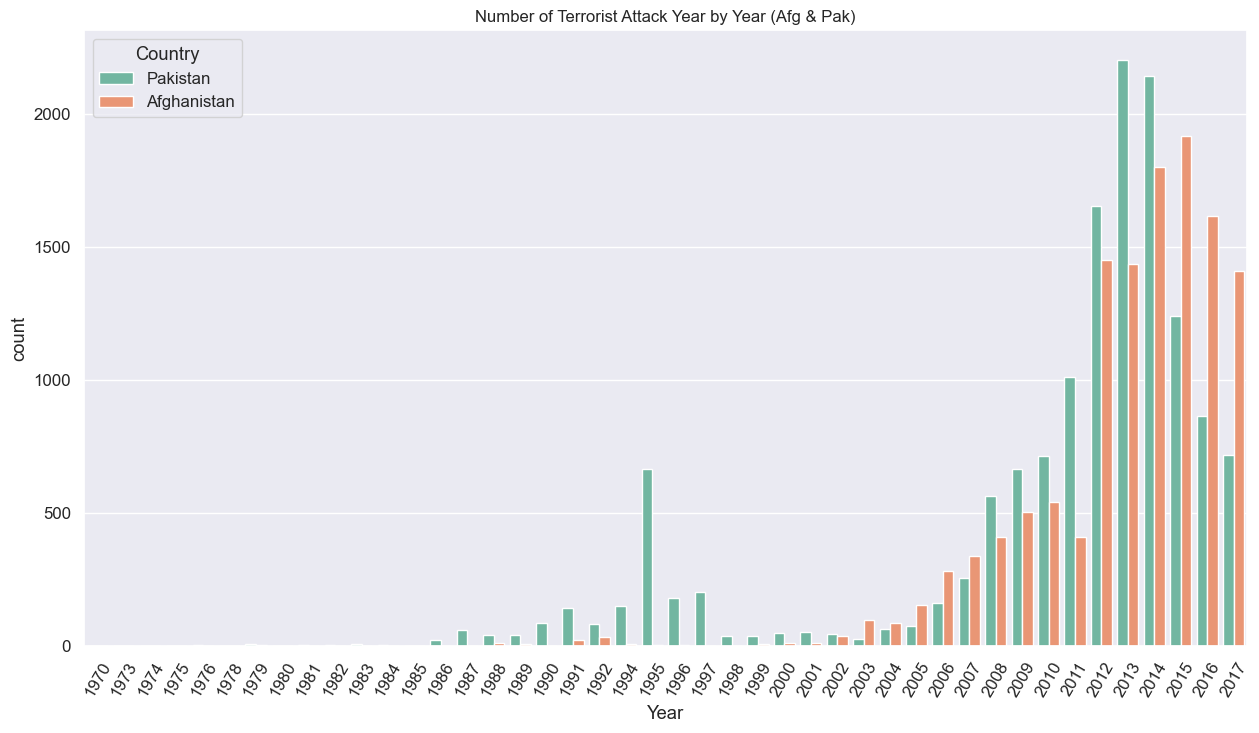

In [72]:
f = plt.figure(figsize=(15, 8))

sns.set(font_scale=1.1)
year_count = sns.countplot(x='Year', data=reg_groupby_SA_df_sel_country, hue='Country', palette="Set2")
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=60)
plt.title('Number of Terrorist Attack Year by Year (Afg & Pak)', fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/Terror_attack_Pak_Afg.png', dpi=200)